# 0.2 Data Analysis

### Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import data_scientist_challenge___latam_airlines.utils.paths as path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import time

### Data analysis

In [3]:
synthetic_features = path.data_processed_dir("synthetic_features.csv")

In [4]:
df_synthetic_features = pd.read_csv(synthetic_features)
df_synthetic_features 

/var/folders/mh/4z__6zcj6mv5slhwpb8j4xq40000gn/T/ipykernel_71056/3025868644.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_synthetic_features = pd.read_csv(synthetic_features)


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,SIGLAORI,SIGLADES,Hora-I,Fecha-I-sin-hora,Hora-O,Fecha-O-sin-hora,dif_mim,atraso_15,temporada_alta,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,23:30:00,2017-01-01,23:33:00,2017-01-01,3.0,no,1,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,23:30:00,2017-01-02,23:39:00,2017-01-02,9.0,no,1,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,23:30:00,2017-01-03,23:39:00,2017-01-03,9.0,no,1,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,23:30:00,2017-01-04,23:33:00,2017-01-04,3.0,no,1,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,23:30:00,2017-01-05,23:28:00,2017-01-05,-2.0,no,1,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,Santiago,Lima,14:55:00,2017-12-22,15:41:00,2017-12-22,46.0,si,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,Santiago,Lima,14:55:00,2017-12-25,15:11:00,2017-12-25,16.0,si,1,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,Santiago,Lima,14:55:00,2017-12-27,15:35:00,2017-12-27,40.0,si,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,Santiago,Lima,14:55:00,2017-12-29,15:08:00,2017-12-29,13.0,no,1,tarde


In [5]:
df_synthetic_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha-I           68206 non-null  object 
 1   Vlo-I             68206 non-null  object 
 2   Ori-I             68206 non-null  object 
 3   Des-I             68206 non-null  object 
 4   Emp-I             68206 non-null  object 
 5   Fecha-O           68206 non-null  object 
 6   Vlo-O             68205 non-null  object 
 7   Ori-O             68206 non-null  object 
 8   Des-O             68206 non-null  object 
 9   Emp-O             68206 non-null  object 
 10  DIA               68206 non-null  int64  
 11  MES               68206 non-null  int64  
 12  AÑO               68206 non-null  int64  
 13  DIANOM            68206 non-null  object 
 14  TIPOVUELO         68206 non-null  object 
 15  OPERA             68206 non-null  object 
 16  SIGLAORI          68206 non-null  object

In [6]:
df_synthetic_features['Fecha-I'] = df_synthetic_features['Fecha-I'].apply(lambda x: pd.to_datetime(x,errors='coerce'))
df_synthetic_features['Fecha-O'] = df_synthetic_features['Fecha-O'].apply(lambda x: pd.to_datetime(x,errors='coerce'))

#### ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? 

#### Cantidad de atrasos por destino

In [7]:
df_synthetic_features.groupby(['SIGLADES']).agg({'atraso_15':'value_counts'})

atraso_15
SIGLADES    atraso_15           
Antofagasta no              4939
            si               847
Arica       no              2106
            si               330
Asuncion    no               166
...                          ...
Ushuia      si                 4
            no                 2
Valdivia    no               636
            si               117
Washington  no                 1

[117 rows x 1 columns]

In [8]:
delay_by_destiny = df_synthetic_features.groupby(['atraso_15', 'SIGLADES'])['Des-O'].size().unstack(fill_value=0)
delay_by_destiny

SIGLADES,Antofagasta,Arica,Asuncion,Atlanta,Auckland N.Z.,Balmaceda,Bariloche,Bogota,Buenos Aires,Calama,...,"San Juan, Arg.",Santa Cruz,Sao Paulo,Sydney,Temuco,Toronto,Tucuman,Ushuia,Valdivia,Washington
atraso_15,,,,,,,,,,,,,,,,,,,,,
no,4939,2106,166,337,226,716,1,1189,4715,4517,...,27,90,2688,81,2186,194,28,2,636,1
si,847,330,66,21,135,123,1,415,1620,629,...,8,30,881,113,403,89,10,4,117,0


In [9]:
columns = delay_by_destiny.columns.values[1:]
delay_by_destiny_transpose = pd.pivot_table(delay_by_destiny, columns='atraso_15', values=columns).reset_index()
delay_by_destiny_transpose

atraso_15,SIGLADES,no,si
0,Arica,2106,330
1,Asuncion,166,66
2,Atlanta,337,21
3,Auckland N.Z.,226,135
4,Balmaceda,716,123
...,...,...,...
56,Toronto,194,89
57,Tucuman,28,10
58,Ushuia,2,4
59,Valdivia,636,117


In [10]:
delay_by_destiny_transpose ['tasa_de_atraso_por_destino'] = (delay_by_destiny_transpose['si']/(delay_by_destiny_transpose['si']+delay_by_destiny_transpose['no']))*100
delay_by_destiny_transpose

atraso_15,SIGLADES,no,si,tasa_de_atraso_por_destino
0,Arica,2106,330,13.546798
1,Asuncion,166,66,28.448276
2,Atlanta,337,21,5.865922
3,Auckland N.Z.,226,135,37.396122
4,Balmaceda,716,123,14.660310
...,...,...,...,...
56,Toronto,194,89,31.448763
57,Tucuman,28,10,26.315789
58,Ushuia,2,4,66.666667
59,Valdivia,636,117,15.537849


In [11]:
delay_by_destiny_transpose.set_index('SIGLADES', inplace=True)
delay_by_destiny_transpose

atraso_15,no,si,tasa_de_atraso_por_destino
SIGLADES,,,
Arica,2106,330,13.546798
Asuncion,166,66,28.448276
Atlanta,337,21,5.865922
Auckland N.Z.,226,135,37.396122
Balmaceda,716,123,14.660310
...,...,...,...
Toronto,194,89,31.448763
Tucuman,28,10,26.315789
Ushuia,2,4,66.666667


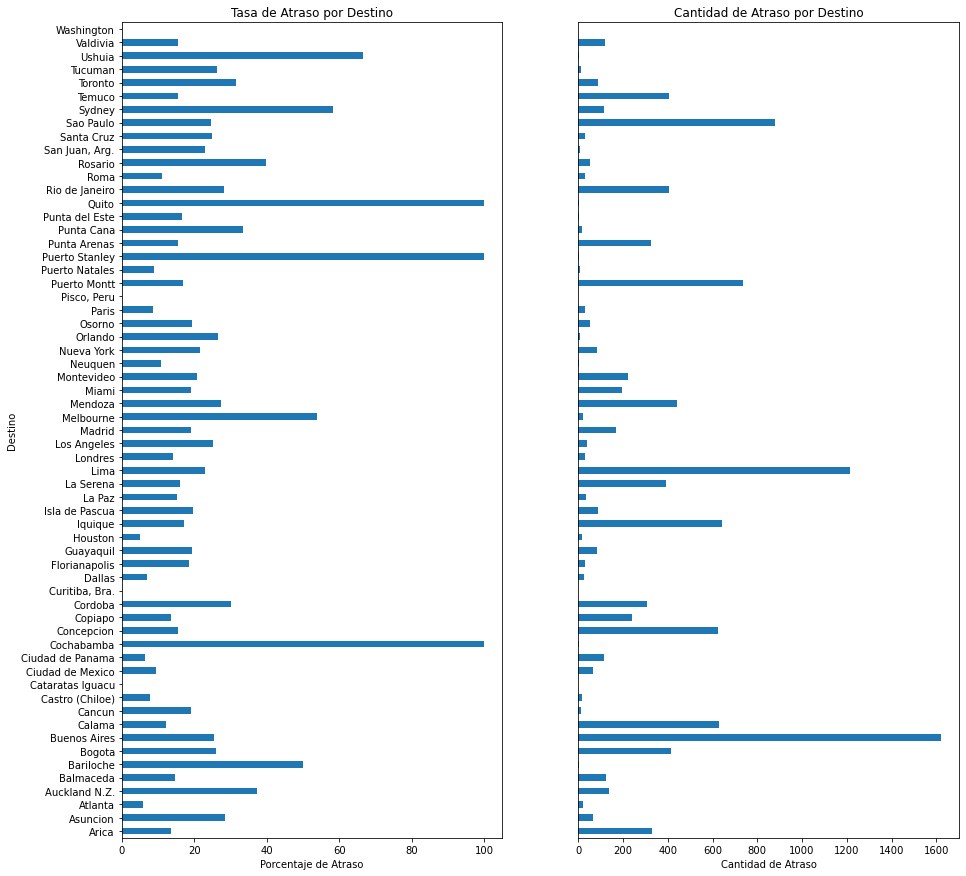

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (15, 15))
delay_by_destiny_transpose["tasa_de_atraso_por_destino"].plot.barh(ax = ax[0])
ax[0].set_title("Tasa de Atraso por Destino")
ax[0].set_ylabel("Destino")
ax[0].set_xlabel('Porcentaje de Atraso')
delay_by_destiny_transpose["si"].plot.barh(ax = ax[1])
ax[1].set_title("Cantidad de Atraso por Destino")
ax[1].set_xlabel('Cantidad de Atraso')
ax[1].get_yaxis().set_visible(False)
plt.show()

#### Cantidad de atrasos por aerolínea

In [13]:
df_synthetic_features.groupby(['OPERA']).agg({'atraso_15':'value_counts'})

atraso_15
OPERA                    atraso_15           
Aerolineas Argentinas    no              1481
                         si               468
Aeromexico               no               341
                         si                10
Air Canada               no               307
                         si               258
Air France               no               328
                         si                30
Alitalia                 no               230
                         si                29
American Airlines        no               706
                         si                51
Austral                  no                59
                         si                15
Avianca                  no               846
                         si               306
British Airways          no               176
                         si                29
Copa Air                 no              1734
                         si               116
Delta Air                no               337
                         si                21
Gol Trans                no               519
                         si               287
Grupo LATAM              no             33586
                         si              7306
Iberia                   no               326
                         si                36
JetSmart SPA             no               899
                         si               196
K.L.M.                   no               230
                         si                21
Lacsa                    no                81
                         si                11
Latin American Wings     no               993
                         si               681
Oceanair Linhas Aereas   no               236
                         si                43
Plus Ultra Lineas Aereas si                30
                         no                19
Qantas Airways           si               113
                         no                82
Sky Airline              no             11758
                         si              2540
United Airlines          no               318
                         si                17

In [14]:
delay_by_operator = df_synthetic_features.groupby(['atraso_15', 'OPERA'])['Vlo-O'].size().unstack(fill_value=0)
delay_by_operator

OPERA,Aerolineas Argentinas,Aeromexico,Air Canada,Air France,Alitalia,American Airlines,Austral,Avianca,British Airways,Copa Air,...,Iberia,JetSmart SPA,K.L.M.,Lacsa,Latin American Wings,Oceanair Linhas Aereas,Plus Ultra Lineas Aereas,Qantas Airways,Sky Airline,United Airlines
atraso_15,,,,,,,,,,,,,,,,,,,,,
no,1481,341,307,328,230,706,59,846,176,1734,...,326,899,230,81,993,236,19,82,11758,318
si,468,10,258,30,29,51,15,306,29,116,...,36,196,21,11,681,43,30,113,2540,17


In [15]:
columns_opera = delay_by_operator.columns.values[:]
delay_by_operator_transpose = pd.pivot_table(delay_by_operator, columns='atraso_15', values=columns_opera).reset_index()
delay_by_operator_transpose

atraso_15,OPERA,no,si
0,Aerolineas Argentinas,1481,468
1,Aeromexico,341,10
2,Air Canada,307,258
3,Air France,328,30
4,Alitalia,230,29
5,American Airlines,706,51
6,Austral,59,15
7,Avianca,846,306
8,British Airways,176,29
9,Copa Air,1734,116


In [16]:
delay_by_operator_transpose['tasa_de_atraso_por_aerolinea'] = (delay_by_operator_transpose['si']/(delay_by_operator_transpose['si']+delay_by_operator_transpose['no']))*100
delay_by_operator_transpose

atraso_15,OPERA,no,si,tasa_de_atraso_por_aerolinea
0,Aerolineas Argentinas,1481,468,24.012314
1,Aeromexico,341,10,2.849003
2,Air Canada,307,258,45.663717
3,Air France,328,30,8.379888
4,Alitalia,230,29,11.196911
5,American Airlines,706,51,6.737120
6,Austral,59,15,20.270270
7,Avianca,846,306,26.562500
8,British Airways,176,29,14.146341
9,Copa Air,1734,116,6.270270


In [17]:
delay_by_operator_transpose.set_index('OPERA', inplace=True)
delay_by_operator_transpose

atraso_15,no,si,tasa_de_atraso_por_aerolinea
OPERA,,,
Aerolineas Argentinas,1481,468,24.012314
Aeromexico,341,10,2.849003
Air Canada,307,258,45.663717
Air France,328,30,8.379888
Alitalia,230,29,11.196911
American Airlines,706,51,6.737120
Austral,59,15,20.270270
Avianca,846,306,26.562500
British Airways,176,29,14.146341


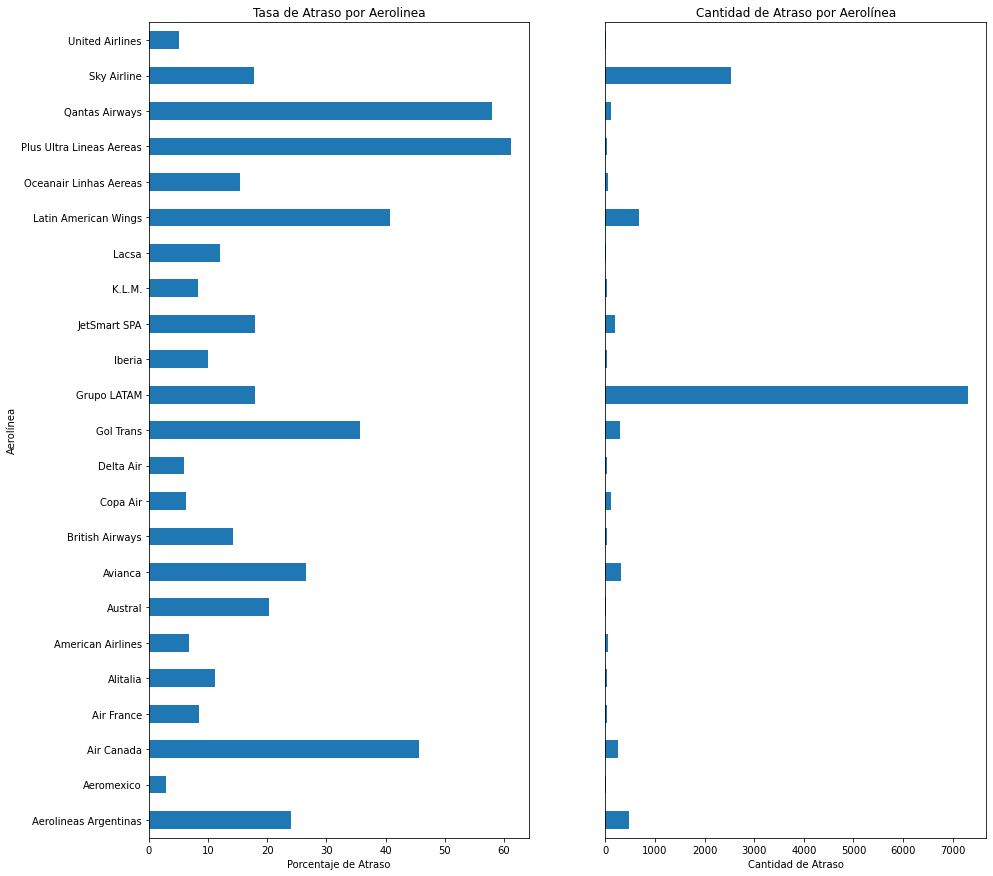

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (15, 15))
delay_by_operator_transpose["tasa_de_atraso_por_aerolinea"].plot.barh(ax = ax[0])
ax[0].set_title("Tasa de Atraso por Aerolinea")
ax[0].set_ylabel("Aerolínea")
ax[0].set_xlabel('Porcentaje de Atraso')
delay_by_operator_transpose["si"].plot.barh(ax = ax[1])
ax[1].set_title("Cantidad de Atraso por Aerolínea")
ax[1].set_xlabel('Cantidad de Atraso')
ax[1].get_yaxis().set_visible(False)
plt.show()

#### Cantidad de atrasos por mes del año

In [19]:
df_synthetic_features.groupby(['MES']).agg({'atraso_15':'value_counts'})

atraso_15
MES atraso_15           
1   no              5130
    si               978
2   no              4718
    si               843
3   no              4851
    si               631
4   no              4435
    si               585
5   no              4413
    si               827
6   no              4129
    si               852
7   no              4234
    si              1758
8   no              4748
    si               996
9   no              4643
    si               967
10  no              4669
    si              1363
11  no              4881
    si              1199
12  no              4741
    si              1615

In [20]:
delay_by_month = df_synthetic_features.groupby(['atraso_15', 'MES'])['Vlo-O'].size().unstack(fill_value=0)
delay_by_month

MES,1,2,3,4,5,6,7,8,9,10,11,12
atraso_15,,,,,,,,,,,,
no,5130,4718,4851,4435,4413,4129,4234,4748,4643,4669,4881,4741
si,978,843,631,585,827,852,1758,996,967,1363,1199,1615


In [21]:
columns_month = delay_by_month.columns.values[:]
delay_by_month_transpose = pd.pivot_table(delay_by_month, columns='atraso_15', values=columns_month).reset_index()
delay_by_month_transpose

atraso_15,MES,no,si
0,1,5130,978
1,2,4718,843
2,3,4851,631
3,4,4435,585
4,5,4413,827
5,6,4129,852
6,7,4234,1758
7,8,4748,996
8,9,4643,967
9,10,4669,1363


In [22]:
delay_by_month_transpose['tasa_de_atraso_por_mes'] = (delay_by_month_transpose['si']/(delay_by_month_transpose['si']+delay_by_month_transpose['no']))*100
delay_by_month_transpose

atraso_15,MES,no,si,tasa_de_atraso_por_mes
0,1,5130,978,16.011788
1,2,4718,843,15.159144
2,3,4851,631,11.510398
3,4,4435,585,11.653386
4,5,4413,827,15.782443
5,6,4129,852,17.104999
6,7,4234,1758,29.339119
7,8,4748,996,17.339833
8,9,4643,967,17.237077
9,10,4669,1363,22.596154


In [23]:
delay_by_month_transpose.set_index('MES', inplace=True)
delay_by_month_transpose

atraso_15,no,si,tasa_de_atraso_por_mes
MES,,,
1,5130,978,16.011788
2,4718,843,15.159144
3,4851,631,11.510398
4,4435,585,11.653386
5,4413,827,15.782443
6,4129,852,17.104999
7,4234,1758,29.339119
8,4748,996,17.339833
9,4643,967,17.237077


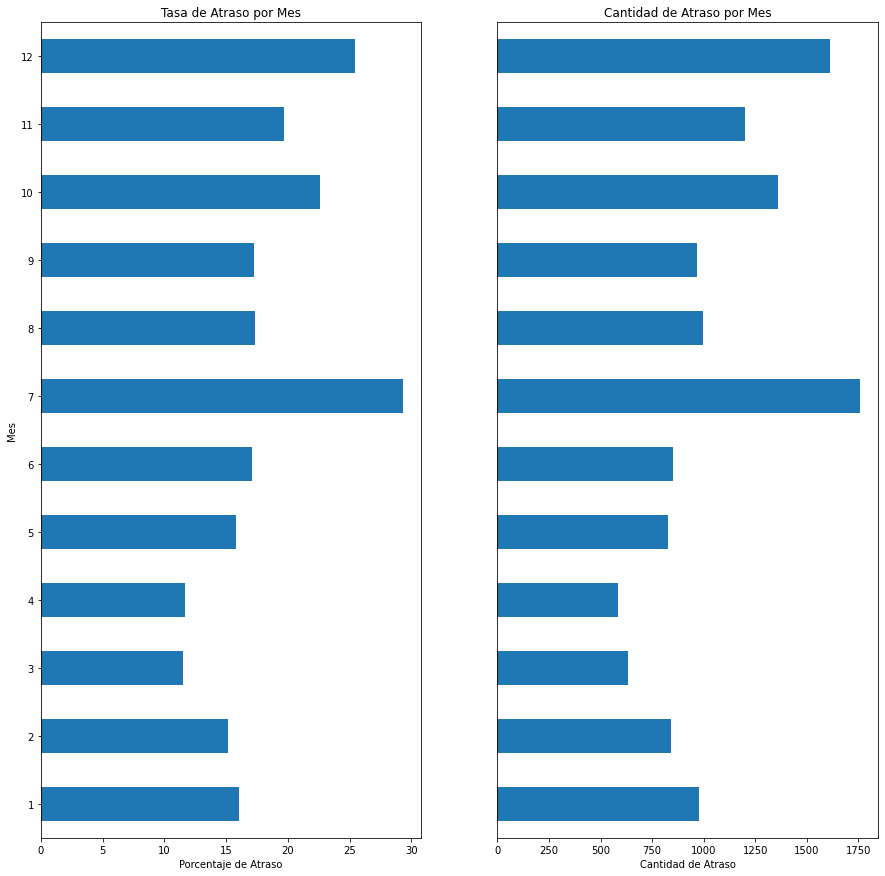

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (15, 15))
delay_by_month_transpose["tasa_de_atraso_por_mes"].plot.barh(ax = ax[0])
ax[0].set_title("Tasa de Atraso por Mes")
ax[0].set_ylabel("Mes")
ax[0].set_xlabel('Porcentaje de Atraso')
delay_by_month_transpose["si"].plot.barh(ax = ax[1])
ax[1].set_title("Cantidad de Atraso por Mes")
ax[1].set_xlabel('Cantidad de Atraso')
ax[1].get_yaxis().set_visible(False)
plt.show()

#### Cantidad de atrasos por dia de la semana

In [25]:
df_synthetic_features.groupby(['DIANOM']).agg({'atraso_15':'value_counts'})

atraso_15
DIANOM    atraso_15           
Domingo   no              8218
          si              1578
Jueves    no              8206
          si              2045
Lunes     no              8083
          si              2048
Martes    no              8028
          si              1634
Miercoles no              8061
          si              1661
Sabado    no              6989
          si              1363
Viernes   no              8007
          si              2285

In [26]:
delay_by_day = df_synthetic_features.groupby(['atraso_15', 'DIANOM'])['Vlo-O'].size().unstack(fill_value=0)
delay_by_day

DIANOM,Domingo,Jueves,Lunes,Martes,Miercoles,Sabado,Viernes
atraso_15,,,,,,,
no,8218,8206,8083,8028,8061,6989,8007
si,1578,2045,2048,1634,1661,1363,2285


In [27]:
columns_day = delay_by_day.columns.values[1:]
delay_by_day_transpose = pd.pivot_table(delay_by_day, columns='atraso_15', values=columns_day).reset_index()
delay_by_day_transpose

atraso_15,DIANOM,no,si
0,Jueves,8206,2045
1,Lunes,8083,2048
2,Martes,8028,1634
3,Miercoles,8061,1661
4,Sabado,6989,1363
5,Viernes,8007,2285


In [28]:
delay_by_day_transpose['tasa_de_atraso_por_dia'] = (delay_by_day_transpose['si']/(delay_by_day_transpose['si']+delay_by_day_transpose['no']))*100
delay_by_day_transpose

atraso_15,DIANOM,no,si,tasa_de_atraso_por_dia
0,Jueves,8206,2045,19.949273
1,Lunes,8083,2048,20.215181
2,Martes,8028,1634,16.911613
3,Miercoles,8061,1661,17.084962
4,Sabado,6989,1363,16.319444
5,Viernes,8007,2285,22.201710


In [29]:
delay_by_day_transpose.set_index('DIANOM', inplace=True)
delay_by_day_transpose

atraso_15,no,si,tasa_de_atraso_por_dia
DIANOM,,,
Jueves,8206,2045,19.949273
Lunes,8083,2048,20.215181
Martes,8028,1634,16.911613
Miercoles,8061,1661,17.084962
Sabado,6989,1363,16.319444
Viernes,8007,2285,22.201710


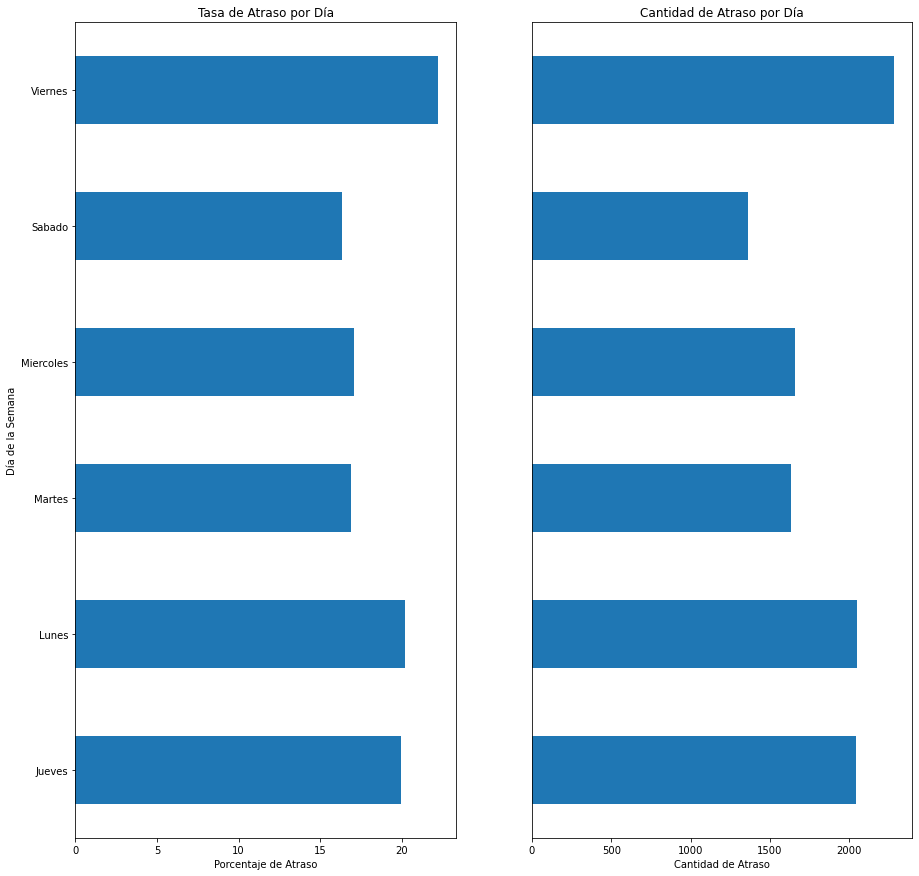

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (15, 15))
delay_by_day_transpose["tasa_de_atraso_por_dia"].plot.barh(ax = ax[0])
ax[0].set_title("Tasa de Atraso por Día")
ax[0].set_ylabel("Día de la Semana")
ax[0].set_xlabel('Porcentaje de Atraso')
delay_by_day_transpose["si"].plot.barh(ax = ax[1])
ax[1].set_title("Cantidad de Atraso por Día")
ax[1].set_xlabel('Cantidad de Atraso')
ax[1].get_yaxis().set_visible(False)
plt.show()

#### Cantidad de atrasos por temporada

In [31]:
df_synthetic_features.groupby(['temporada_alta']).agg({'atraso_15':'value_counts'})

atraso_15
temporada_alta atraso_15           
0              no             37300
               si              8144
1              no             18292
               si              4470

In [32]:
delay_by_season = df_synthetic_features.groupby(['atraso_15', 'temporada_alta'])['Vlo-O'].size().unstack(fill_value=0)
delay_by_season

temporada_alta,0,1
atraso_15,,
no,37300,18292
si,8144,4470


In [33]:
columns_season = delay_by_season.columns.values[:]
delay_by_season_transpose = pd.pivot_table(delay_by_season, columns='atraso_15', values=columns_season).reset_index()
delay_by_season_transpose

atraso_15,temporada_alta,no,si
0,0,37300,8144
1,1,18292,4470


In [34]:
delay_by_season_transpose['tasa_de_atraso_por_temporada'] = (delay_by_season_transpose['si']/(delay_by_season_transpose['si']+delay_by_season_transpose['no']))*100
delay_by_season_transpose

atraso_15,temporada_alta,no,si,tasa_de_atraso_por_temporada
0,0,37300,8144,17.920958
1,1,18292,4470,19.637993


In [35]:
delay_by_season_transpose.set_index('temporada_alta', inplace=True)
delay_by_season_transpose

atraso_15,no,si,tasa_de_atraso_por_temporada
temporada_alta,,,
0,37300,8144,17.920958
1,18292,4470,19.637993


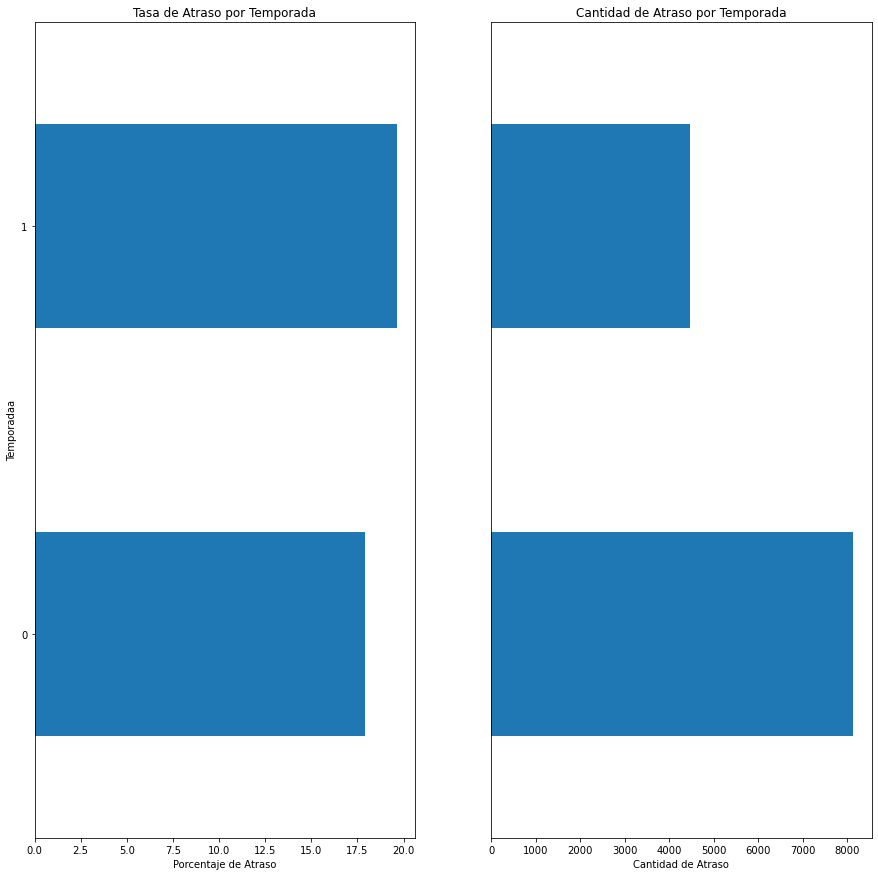

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (15, 15))
delay_by_season_transpose["tasa_de_atraso_por_temporada"].plot.barh(ax = ax[0])
ax[0].set_title("Tasa de Atraso por Temporada")
ax[0].set_ylabel("Temporadaa")
ax[0].set_xlabel('Porcentaje de Atraso')
delay_by_season_transpose["si"].plot.barh(ax = ax[1])
ax[1].set_title("Cantidad de Atraso por Temporada")
ax[1].set_xlabel('Cantidad de Atraso')
ax[1].get_yaxis().set_visible(False)
plt.show()

#### Cantidad de atrasos por tipo de vuelo

In [37]:
df_synthetic_features.groupby(['TIPOVUELO']).agg({'atraso_15':'value_counts'})

atraso_15
TIPOVUELO atraso_15           
I         no             24192
          si              7048
N         no             31400
          si              5566

In [38]:
delay_by_type = df_synthetic_features.groupby(['atraso_15', 'TIPOVUELO'])['Vlo-O'].size().unstack(fill_value=0)
delay_by_type

TIPOVUELO,I,N
atraso_15,,
no,24192,31400
si,7048,5566


In [40]:
columns_type = delay_by_type.columns.values[:]
delay_by_type_transpose = pd.pivot_table(delay_by_type, columns='atraso_15', values=columns_type).reset_index()
delay_by_type_transpose

atraso_15,TIPOVUELO,no,si
0,I,24192,7048
1,N,31400,5566


In [41]:
delay_by_type_transpose['tasa_de_atraso_por_tipo'] = (delay_by_type_transpose['si']/(delay_by_type_transpose['si']+delay_by_type_transpose['no']))*100
delay_by_type_transpose

atraso_15,TIPOVUELO,no,si,tasa_de_atraso_por_tipo
0,I,24192,7048,22.560819
1,N,31400,5566,15.057079


In [42]:
delay_by_type_transpose.set_index('TIPOVUELO', inplace=True)
delay_by_type_transpose

atraso_15,no,si,tasa_de_atraso_por_tipo
TIPOVUELO,,,
I,24192,7048,22.560819
N,31400,5566,15.057079


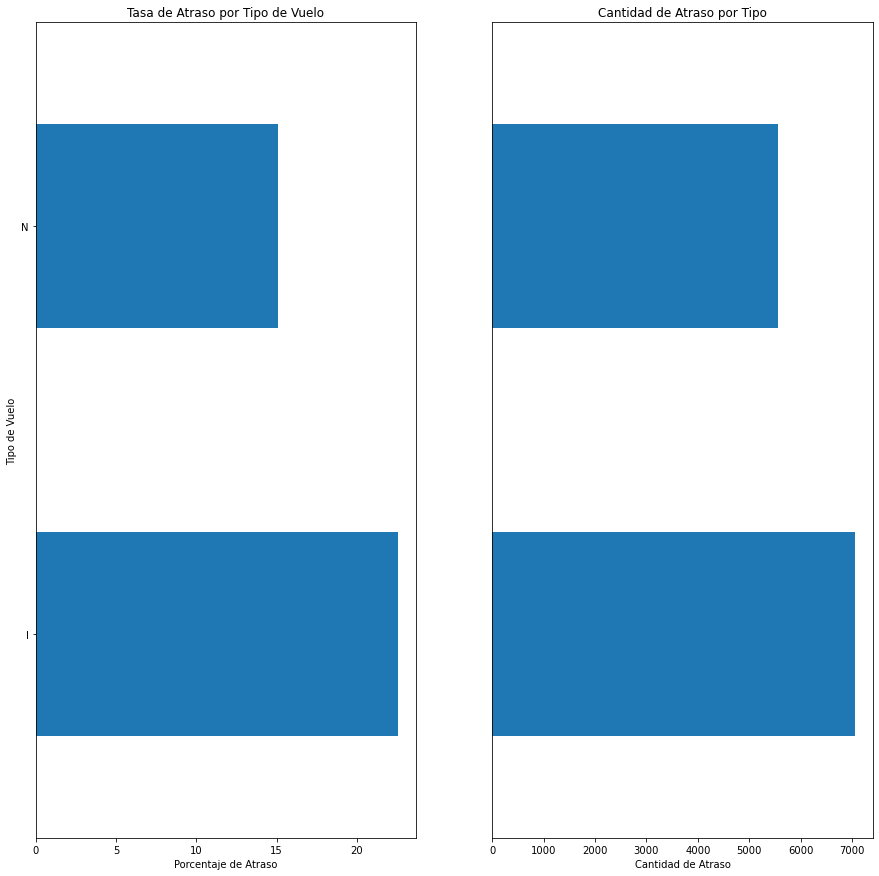

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (15, 15))
delay_by_type_transpose["tasa_de_atraso_por_tipo"].plot.barh(ax = ax[0])
ax[0].set_title("Tasa de Atraso por Tipo de Vuelo")
ax[0].set_ylabel("Tipo de Vuelo")
ax[0].set_xlabel('Porcentaje de Atraso')
delay_by_type_transpose["si"].plot.barh(ax = ax[1])
ax[1].set_title("Cantidad de Atraso por Tipo")
ax[1].set_xlabel('Cantidad de Atraso')
ax[1].get_yaxis().set_visible(False)
plt.show()

#### ¿Qué variables esperarías que más inﬂuyeran en predecir atrasos?

In [44]:
delay_features = df_synthetic_features.groupby(['SIGLADES','OPERA','MES','DIANOM','temporada_alta','TIPOVUELO']).agg({'atraso_15':'value_counts'})
delay_features

atraso_15
SIGLADES    OPERA           MES DIANOM  temporada_alta TIPOVUELO atraso_15           
Antofagasta Grupo LATAM     1   Domingo 1              N         no                41
                                                                 si                 6
                                Jueves  1              N         no                52
                                                                 si                 6
                                Lunes   1              N         no                59
...                                                                               ...
Valdivia    Sky Airline     12  Viernes 0              N         no                 3
                                                                 si                 1
                                        1              N         si                 5
                                                                 no                 1
Washington  United Airlines 8   Martes  0              I         no                 1

[12465 rows x 1 columns]

- Se puede determinar que las variables que más influyen a la hora de predecir un retrazo esta dividido en las características que generar un mayor porcentaje pudiendo generar una hipotesis de que si es un vuelo internacional, en temporada alta, un viernes y coincidiendo con el mes 7 y es de las aerolineas que dieron una tasa mas alta de retraso serian factores determinantes a que esas variables influyan en que tengamos un retraso. 